## **Lab 4**

## **Predicting Diabetes Risk Based on BMI**

### **Introduction**

This model is designed to predict the risk of diabetes based on BMI. This is a critical application as diabetes is a widespread and potentially dangerous health condition, and being able to anticipate the risk could lead to early interventions and preventative measures.

### **Train the model**

We will train our model using the scikit-learn's diabetes dataset, which contains real-world clinical data, allowing us to create a robust and reliable prediction model for predicting diabetes risk based on BMI. The dataset's varied variety of variables enables complete model training, supporting the development of a prediction tool capable of accurately assessing diabetes risk in people.


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### **Load the Dataset**

Loading the diabetes dataset with the parameter scaled=False, we're asking for the original, unadjusted data. This means we'll see the data as it was originally measured, without any standardization or scaling. It can make it easier to understand and interpret the values, which is helpful for gaining insights into the relationship between the data and the risk of diabetes.

In [2]:
dia_ds = datasets.load_diabetes(return_X_y=False, as_frame=False, scaled=False)
X = dia_ds.data[:, np.newaxis, 2]
y = dia_ds.target

The diabetes dataset comprises data from 442 patients and includes the following features:

- age (age in years)
- sex
- bmi (body mass index)
- bp (average blood pressure)
- s1 tc (total serum cholesterol)
- s2 ldl (low-density lipoproteins)
- s3 hdl (high-density lipoproteins)
- s4 tch (total cholesterol / HDL)
- s5 ltg (possibly log of serum triglycerides level)
- s6 glu (blood sugar level)

These features provide a comprehensive insight into various aspects of the patient's health and allow for the exploration of potential relationships between these factors and the risk of diabetes. This will allow a thorough analysis and modeling of diabetes risk based on multiple health-related variables

### **Plotting**

We creating a histogram with BMI on the x-axis and frequency on the y-axis, the resulting visualization provides a representation of the distribution of BMI values within the dataset. Each bar in the histogram represents a certain range of BMI values, and the height of the bar corresponds to the frequency of BMI values within that range. 

Then correlation matrix indicates the relationships between the various columns in the dataset. A correlation value of 1 signifies a strong positive correlation, 0 indicates no correlation, and -1 indicates a strong negative correlation.

Then we Split the values into training, validation and test data. Then we run polynomial regression and loop through each model.

Once we find results, we compare the models and find the best model. Once we find it we run the chosen model on test and graph the train, validation and test datapoints.

Then we equate the best model and manually check expedited diabetes progression for a particular BMI value.




In [3]:
dia_df = pd.DataFrame(dia_ds.data, columns=dia_ds.feature_names)
dia_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


- The mean provides the average value for each attribute.
- The standard deviation (std) signifies the amount of variation or dispersion of the values from the mean value.
- The minimum and maximum values denote the range within which the values of each feature lie. 
- The percentiles (25%, 50%, 75%) shows the insights into the distribution of the data, indicating the values below which a given percentage of data falls.

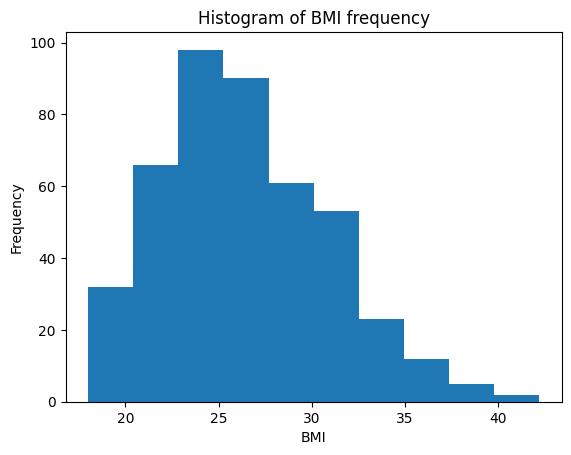

In [4]:
plt.hist(X)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI frequency')
plt.show()

This histogram illustrates the distribution of BMI values across the dataset. It shows a peak around the 25-30 BMI range, indicating that a significant number of patients have BMI values within this range. As BMI values increase beyond 30, the frequency gradually decreases, suggesting that fewer patients have higher BMI values. This also indicates a concentration of patients with moderate BMI values and fewer with extreme BMI values. Understanding this distribution will help in assessing the potential relationship between BMI and diabetes risk.

In [5]:
correlation_matrix = dia_df.corr()
print(correlation_matrix)

          age       sex       bmi        bp        s1        s2        s3   
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181  \
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

The above correlation matrix indicates the relationships between the various columns in the dataset. A correlation value of 1 signifies a strong positive correlation, 0 indicates no correlation, and -1 indicates a strong negative correlation.

Few observations after analyzing the above data,

- There is a relatively strong positive correlation between BMI and blood pressure (bp).
- Total serum cholesterol (s1) and low-density lipoproteins (s2) also exhibit a strong positive correlation.
- There appears to be a moderate positive correlation between age and blood sugar level (s6).
- No significant correlations (near 0) are observed between age and BMI, or between high-density lipoproteins (s3) and blood sugar level (s6).

### **Splitting the values into validation, training and test data**

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### **Running polynomial regression**

In [7]:
# Running for degree 0 to 5
degrees = [0, 1, 2, 3, 4, 5]

train_scores = []
val_scores = []
train_maes = []
val_maes = []
train_mapes = []
val_mapes = []
models = []

Looping through each degree model


In [8]:
for degree in degrees:
    poly_f = PolynomialFeatures(degree=degree)
    X_p_train = poly_f.fit_transform(X_train)
    X_p_val = poly_f.transform(X_val)
    model = LinearRegression()
    model.fit(X_p_train, y_train)
    train_pred = model.predict(X_p_train)
    val_pred = model.predict(X_p_val)
    train_scores.append(r2_score(y_train, train_pred))
    val_scores.append(r2_score(y_val, val_pred))
    train_maes.append(mean_absolute_error(y_train, train_pred))
    val_maes.append(mean_absolute_error(y_val, val_pred))
    train_mapes.append(mean_absolute_percentage_error(y_train, train_pred))
    val_mapes.append(mean_absolute_percentage_error(y_val, val_pred))
    models.append(model)   

### **Model results**

In [9]:
results_df = pd.DataFrame({
    'Degree': degrees,
    'Train R^2': train_scores,
    'Validation R^2': val_scores,
    'Train MAE': train_maes,
    'Validation MAE': val_maes,
    'Train MAPE': train_mapes,
    'Validation MAPE': val_mapes
})

print(results_df)

   Degree  Train R^2  Validation R^2  Train MAE  Validation MAE  Train MAPE   
0       0   0.000000       -0.008055  66.713922       62.042954    0.637647  \
1       1   0.365765        0.302543  51.951199       48.270702    0.482628   
2       2   0.366837        0.296223  51.883089       48.273028    0.482172   
3       3   0.366840        0.297015  51.878337       48.235127    0.482086   
4       4   0.368665        0.263194  51.772629       48.367440    0.479762   
5       5   0.369675        0.297578  51.760799       47.348851    0.479192   

   Validation MAPE  
0         0.579577  
1         0.420456  
2         0.419024  
3         0.418775  
4         0.414836  
5         0.407376  


### **Comparing the models**

In [10]:
best_degree = degrees[np.argmax(val_scores)]
best_model = models[np.argmax(val_scores)]

print(f"Best Model is of degree {best_degree}")

Best Model is of degree 1


### **Run chosen model to test**

In [11]:
X_p_test = PolynomialFeatures(degree=best_degree).fit_transform(X_test)
test_pred = best_model.predict(X_p_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Test R^2:", test_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)

Test R^2: 0.2605731984821167
Test MSE: 4198.449565925882
Test MAE: 52.880785447649295


### **Graph of the train, validation and test datapoints**

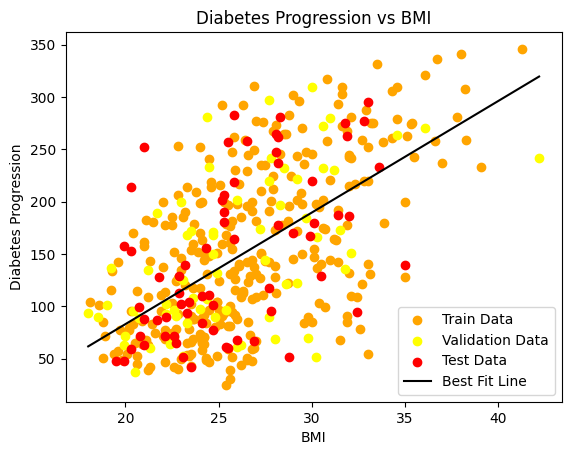

In [12]:
plt.scatter(X_train, y_train, color='orange', label='Train Data')
plt.scatter(X_val, y_val, color='yellow', label='Validation Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Diabetes Progression vs BMI')
x_values = np.linspace(X.min(), X.max(), 100)
x_p_values = PolynomialFeatures(degree=best_degree).fit_transform(x_values.reshape(-1, 1))
y_values = best_model.predict(x_p_values)
plt.plot(x_values, y_values, color='black', label='Best Fit Line')
plt.legend()
plt.show()

### **Equation of the best model**

In [13]:
coefs = best_model.coef_
intercept = best_model.intercept_
equation = f"Diabetes Progression = {intercept:.2f}"
for i in range(1, best_degree + 1):
    equation += f" + {coefs[i]:.2f} * BMI^{i}"
print("Equation of the best model:", equation)

Equation of the best model: Diabetes Progression = -129.95 + 10.65 * BMI^1


##### Manually checking expedited diabetes progression value for BMI of 18

In [14]:
bmi_value = 18
x_p_value = PolynomialFeatures(degree=best_degree).fit_transform(np.array([[bmi_value]]))
expected_progression = best_model.predict(x_p_value)[0]
print("Expected diabetes progression for BMI 18:", expected_progression)

Expected diabetes progression for BMI 18: 61.81217858638183


The expected progression for BMI 18: 61.81 
Model predicted : 62.04

### **Explanation for trainable parameters**

In [15]:
for degree, model in zip(degrees, models):
    poly_f = PolynomialFeatures(degree=degree)
    X_p_train = poly_f.fit_transform(X_train)
    feature_names = poly_f.get_feature_names_out(input_features=['BMI'])
    print(f"Degree {degree}: {X_p_train.shape[1]} trainable parameters")
    print(f"Features: {feature_names}")

Degree 0: 1 trainable parameters
Features: ['1']
Degree 1: 2 trainable parameters
Features: ['1' 'BMI']
Degree 2: 3 trainable parameters
Features: ['1' 'BMI' 'BMI^2']
Degree 3: 4 trainable parameters
Features: ['1' 'BMI' 'BMI^2' 'BMI^3']
Degree 4: 5 trainable parameters
Features: ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4']
Degree 5: 6 trainable parameters
Features: ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4' 'BMI^5']
